In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [83]:
# Read data
df = pd.read_csv("SocialNetworkAds_Dataset.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [84]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


# DATA PREPROCESSING

In [85]:
# Separate features and labels
X = df.drop(labels=["Purchased"], axis=1)
y = df["Purchased"]

In [86]:
# Feaure scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [87]:
X

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

# DATA PREPARATION

In [88]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

# MODELS

## LOGISTIC REGRESSION

In [89]:
# Training
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [90]:
# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [91]:
# Mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [92]:
# Gradient of sigmoid function
def sigmoid_gradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [93]:
# Logistic regression using batch gradient descent
def logistic_regression(X, y, learning_rate=0.01, epochs=100):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []
    for epoch in range(epochs):
        y_pred = sigmoid(np.dot(X, weights) + bias)
        loss = mean_squared_error(y, y_pred)
        losses.append(loss)
        d_weights = (1 / n_samples) * np.dot(X.T, (y_pred - y) * sigmoid_gradient(y_pred))
        d_bias = (1 / n_samples) * np.sum((y_pred - y) * sigmoid_gradient(y_pred))
        weights -= learning_rate * d_weights
        bias -= learning_rate * d_bias
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Loss={loss}")
    return weights, bias

In [94]:
# Given data
X = np.array([[3], [5], [8], [1]])
y = np.array([0, 1, 1, 0])

In [95]:
# Train logistic regression model
weights, bias = logistic_regression(X, y, learning_rate=0.01, epochs=100)

Epoch 0: Loss=0.25
Epoch 10: Loss=0.23712326854689492
Epoch 20: Loss=0.22774849607069475
Epoch 30: Loss=0.22093119451300441
Epoch 40: Loss=0.21594770139446373
Epoch 50: Loss=0.21227102952245203
Epoch 60: Loss=0.2095260824111025
Epoch 70: Loss=0.2074479882516967
Epoch 80: Loss=0.20584968799485764
Epoch 90: Loss=0.20459849633700045



### SAMLE PREDICTION

In [96]:
hours_studied = 6
X_new = np.array([[hours_studied]])
y_pred = sigmoid(np.dot(X_new, weights) + bias)
print(f"Predicted probability of passing: {y_pred[0]}")
if y_pred >= 0.5:
    print("Prediction: Pass")
else:
    print("Prediction: Fail")

Predicted probability of passing: 0.694406147496735
Prediction: Pass


In [97]:
# Prediction
y_pred = lr.predict(X_test)

### MODEL EVALUATION

In [98]:
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred)}")

Accuracy: 0.825

		Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.96      0.86        45
           1       0.92      0.66      0.77        35

    accuracy                           0.82        80
   macro avg       0.85      0.81      0.81        80
weighted avg       0.84      0.82      0.82        80



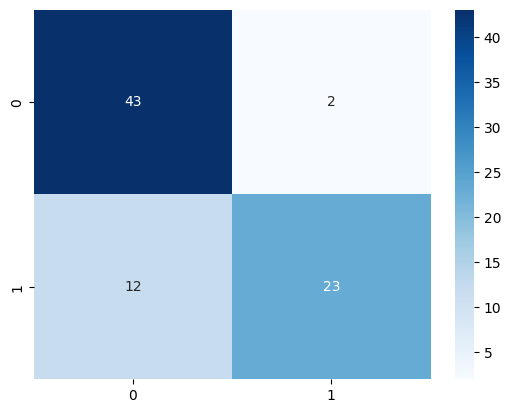

In [99]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
sns.heatmap(cm,annot=True,cmap=plt.cm.Blues)
plt.show()

In [100]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred)

# AUC Score
auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {auc}")

ROC AUC Score: 0.8063492063492064


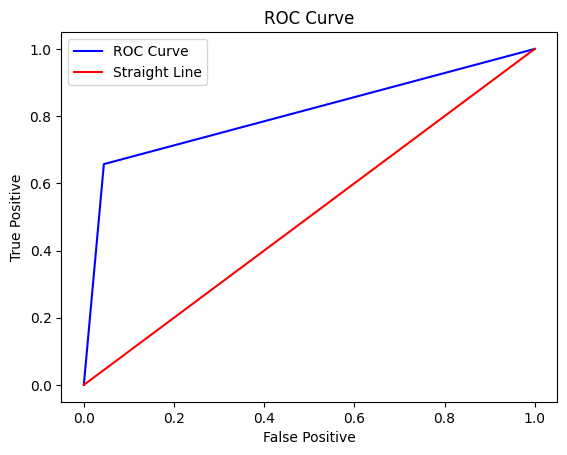

In [101]:
# Plot curve
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Batch Gradient Descent

In [102]:
# Define Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [103]:
# Gradient Descent
def batch_gradient_descent(X, y, epochs=20, lr=0.01):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h-y))//m
        theta -= lr*gradient
        loss = -np.mean(y*np.log(h) + (1-y)*np.log(1-h))
        print(f"Loss afer epoch {epoch+1}: {loss}")
    return theta

In [104]:
def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

In [105]:
theta = batch_gradient_descent(X_train, y_train)
y_pred_batch = predict(X_test, theta)
y_pred_batch = [int(i) for i in y_pred_batch]

Loss afer epoch 1: 0.6931471805599453
Loss afer epoch 2: 0.6885543682797728
Loss afer epoch 3: 0.6840171536191699
Loss afer epoch 4: 0.6795355110757082
Loss afer epoch 5: 0.6751093981924052
Loss afer epoch 6: 0.6707387556281208
Loss afer epoch 7: 0.666423507255703
Loss afer epoch 8: 0.6621635602874859
Loss afer epoch 9: 0.6579588054276275
Loss afer epoch 10: 0.6538091170506679
Loss afer epoch 11: 0.6497143534055935
Loss afer epoch 12: 0.6456743568445922
Loss afer epoch 13: 0.6416889540755975
Loss afer epoch 14: 0.6377579564376357
Loss afer epoch 15: 0.6338811601979164
Loss afer epoch 16: 0.6300583468695341
Loss afer epoch 17: 0.6262892835485949
Loss afer epoch 18: 0.622573723269524
Loss afer epoch 19: 0.6189114053772691
Loss afer epoch 20: 0.6153020559150786


### MODEL EVALUATION

In [106]:
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred_batch)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred_batch)}")

Accuracy: 0.7875

		Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.78      0.80        45
           1       0.74      0.80      0.77        35

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



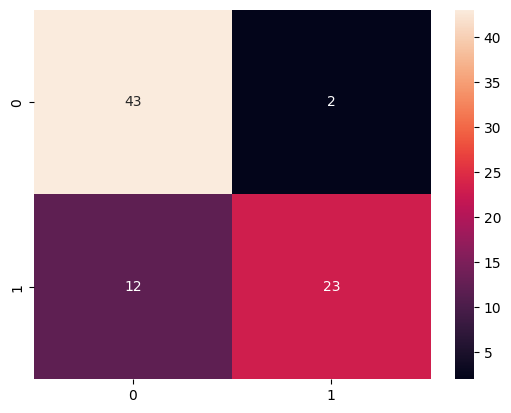

In [107]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
sns.heatmap(cm,annot=True)
plt.show()

In [108]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred_batch)

# AUC Score
auc = roc_auc_score(y_test, y_pred_batch)
print(f"ROC AUC Score: {auc}")

ROC AUC Score: 0.788888888888889


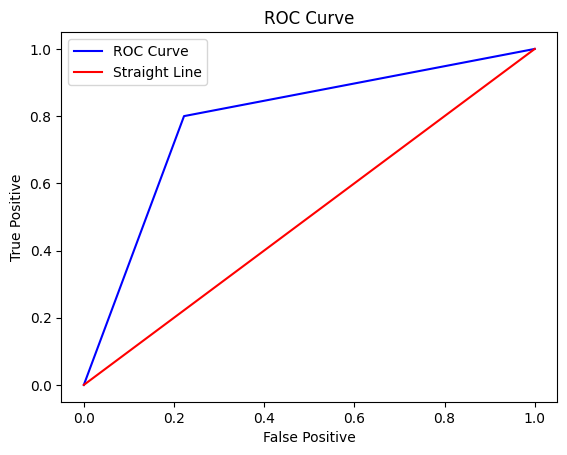

In [109]:
# Plot curve
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [110]:
y_train = y_train.values

# Stochastic Gradient Descent

In [111]:
def stochastic_gradient_descent(X, y, epochs=20, lr=0.01):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        loss = 0
        for i in range(m):
            Xi = X[i]
            yi = y[i]
            z = np.dot(Xi, theta)
            h = sigmoid(z)
            gradient = np.dot(Xi.T, (h-yi))
            theta -= lr*gradient
            loss += -np.mean(yi*np.log(h) + (1-yi)*np.log(1-h))
        print(f"Loss after epoch {epoch+1}: {loss/m}")
    return theta

In [112]:
def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

In [113]:
theta = stochastic_gradient_descent(X_train, y_train, epochs=20, lr=0.01)
y_pred_sgd = predict(X_test, theta)
y_pred_sgd = [int(i) for i in y_pred_sgd]

Loss after epoch 1: 0.5837531014757071
Loss after epoch 2: 0.4889045850186527
Loss after epoch 3: 0.45838845684524127
Loss after epoch 4: 0.4449573224267323
Loss after epoch 5: 0.43801846410762035
Loss after epoch 6: 0.43408056325018896
Loss after epoch 7: 0.43170480965982894
Loss after epoch 8: 0.43020892079031975
Loss after epoch 9: 0.4292369438776148
Loss after epoch 10: 0.42858998193220527
Loss after epoch 11: 0.42815104764528755
Loss after epoch 12: 0.4278485628816922
Loss after epoch 13: 0.4276373529585296
Loss after epoch 14: 0.42748818971245245
Loss after epoch 15: 0.42738177615881956
Loss after epoch 16: 0.42730515759618093
Loss after epoch 17: 0.42724951468550076
Loss after epoch 18: 0.4272087716470754
Loss after epoch 19: 0.42717869967443967
Loss after epoch 20: 0.4271563288911488


### MODEL EVALUATION

In [114]:
from sklearn.metrics import accuracy_score, classification_report
print(f"Accuracy: {accuracy_score(y_test, y_pred_sgd)}\n")
print(f"\t\tClassification Report:\n\n{classification_report(y_test, y_pred_sgd)}")

Accuracy: 0.8

		Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.69      0.79        45
           1       0.70      0.94      0.80        35

    accuracy                           0.80        80
   macro avg       0.82      0.82      0.80        80
weighted avg       0.84      0.80      0.80        80



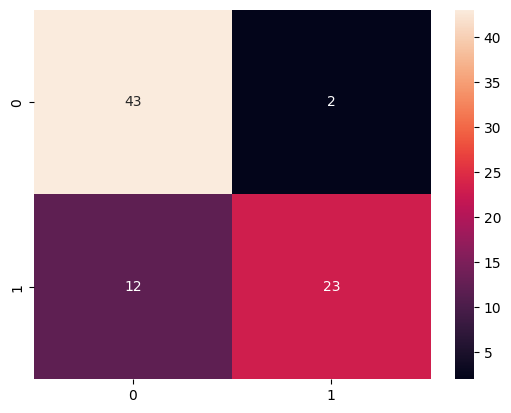

In [115]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
sns.heatmap(cm,annot=True)
plt.show()

In [116]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred_sgd)

# AUC Score
auc = roc_auc_score(y_test, y_pred_sgd)
print(f"ROC AUC Score: {auc}")

ROC AUC Score: 0.8158730158730159


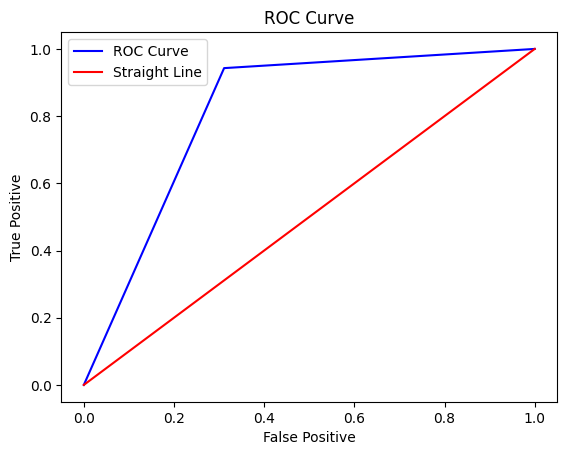

In [117]:
# Plot curve
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Mini Batch Gradient Descent


In [118]:
# Define Sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [119]:
# Gradient Descent
def mini_batch_gradient_descent(X, y, epochs=20, lr=0.01, batch_size=32):
    m, n = X.shape
    theta = np.zeros(n)
    for epoch in range(epochs):
        loss=0
        for batch in range(1,(X.shape[0]//batch_size)+1):
            Xi = X[batch_size*(batch-1):batch_size*batch, :]
            yi = y[batch_size*(batch-1):batch_size*batch]
            z = np.dot(Xi, theta)
            h = sigmoid(z)
            gradient = np.dot(Xi.T, (h-yi))//m
            theta -= lr*gradient
            loss += -np.mean(yi*np.log(h) + (1-yi)*np.log(1-h))
        print(f"Loss afer epoch {epoch+1}: {loss/10}")
    return theta

In [120]:
def predict(X, theta):
    z = np.dot(X, theta)
    return np.round(sigmoid(z))

In [121]:
theta = mini_batch_gradient_descent(X_train, y_train)
y_pred_mini_batch = predict(X_test, theta)
y_pred_mini_batch = [int(i) for i in y_pred_mini_batch]

Loss afer epoch 1: 0.6728490435215146
Loss afer epoch 2: 0.6320327598499468
Loss afer epoch 3: 0.5965769248872136
Loss afer epoch 4: 0.5662399802440083
Loss afer epoch 5: 0.5410752361477373
Loss afer epoch 6: 0.5202089532611771
Loss afer epoch 7: 0.5027084059733108
Loss afer epoch 8: 0.4892187307121528
Loss afer epoch 9: 0.4777550688913486
Loss afer epoch 10: 0.4681106040944544
Loss afer epoch 11: 0.459975879407469
Loss afer epoch 12: 0.4531064918337572
Loss afer epoch 13: 0.44732384793656754
Loss afer epoch 14: 0.44237375483770797
Loss afer epoch 15: 0.4384378528536699
Loss afer epoch 16: 0.4354616864083935
Loss afer epoch 17: 0.4332981274883201
Loss afer epoch 18: 0.43150910237459794
Loss afer epoch 19: 0.4303872164657774
Loss afer epoch 20: 0.4298297199073954


### MODEL EVALUATION

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f"Accuracy: {accuracy_score(y_test, y_pred_mini_batch)}\n")
print(f"Precision: {precision_score(y_test, y_pred_mini_batch)}\n")
print(f"Recall: {recall_score(y_test, y_pred_mini_batch)}\n")
print(f"F1-score: {f1_score(y_test, y_pred_mini_batch)}\n")

Accuracy: 0.825

Precision: 0.7692307692307693

Recall: 0.8571428571428571

F1-score: 0.8108108108108109



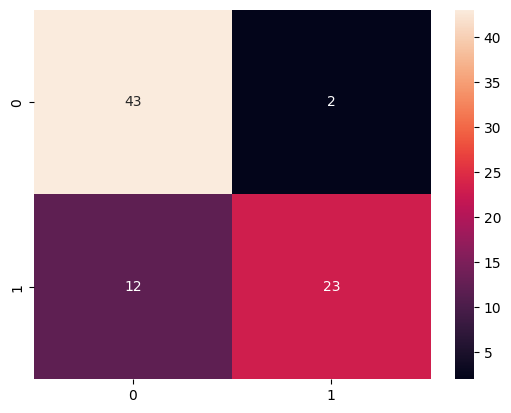

In [123]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
sns.heatmap(cm,annot=True)
plt.show()

In [124]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Get FPR, TPR, Threshold
fpr, tpr, thresh = roc_curve(y_test, y_pred_mini_batch)

# AUC Score
auc = roc_auc_score(y_test, y_pred_mini_batch)
print(f"ROC AUC Score: {auc}")

ROC AUC Score: 0.8285714285714286


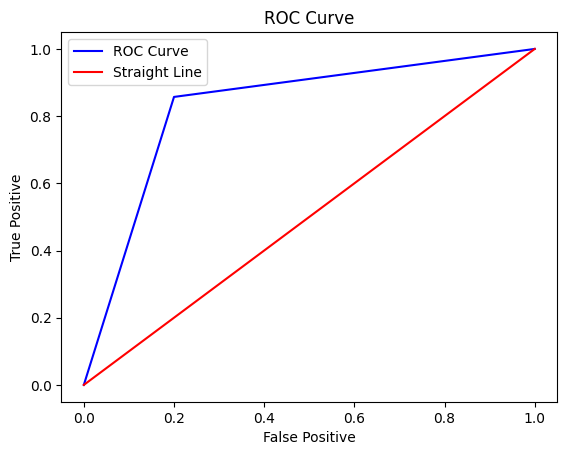

In [125]:
# Plot curve
plt.plot(fpr, tpr, color="Blue", label="ROC Curve")
plt.plot([0,1], [0,1], color="red", label="Straight Line")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("ROC Curve")
plt.legend()
plt.show()